## Tejas Rajan Dewakate.

## Roll No - DS24MS38

## Yes Bank Stock Closing Price Prediction

# Problem Statement :

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Ran Kapoor Owing to this fact, it was interesting t see how that impacted the stock prices of the company and whether Time series models or a y other predictive models can do justice to such situations. This dataset has monthly stock pri es of the bank since its inception and includes closing, starting, highest, and lowest stock price of every m nth. The main objective is to predict the stock’s closing price of the month.

### Importing Packages

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [4]:
df = pd.read_csv("data_YesBank.csv")
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Data Cleaning

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


In [4]:
df.shape

(185, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Date'] = df['Date'].dt.strftime('%b-%y')
print(df)

       Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

# Exploratory Data Analysis (EDA)

### 1.Univariate Analysis:

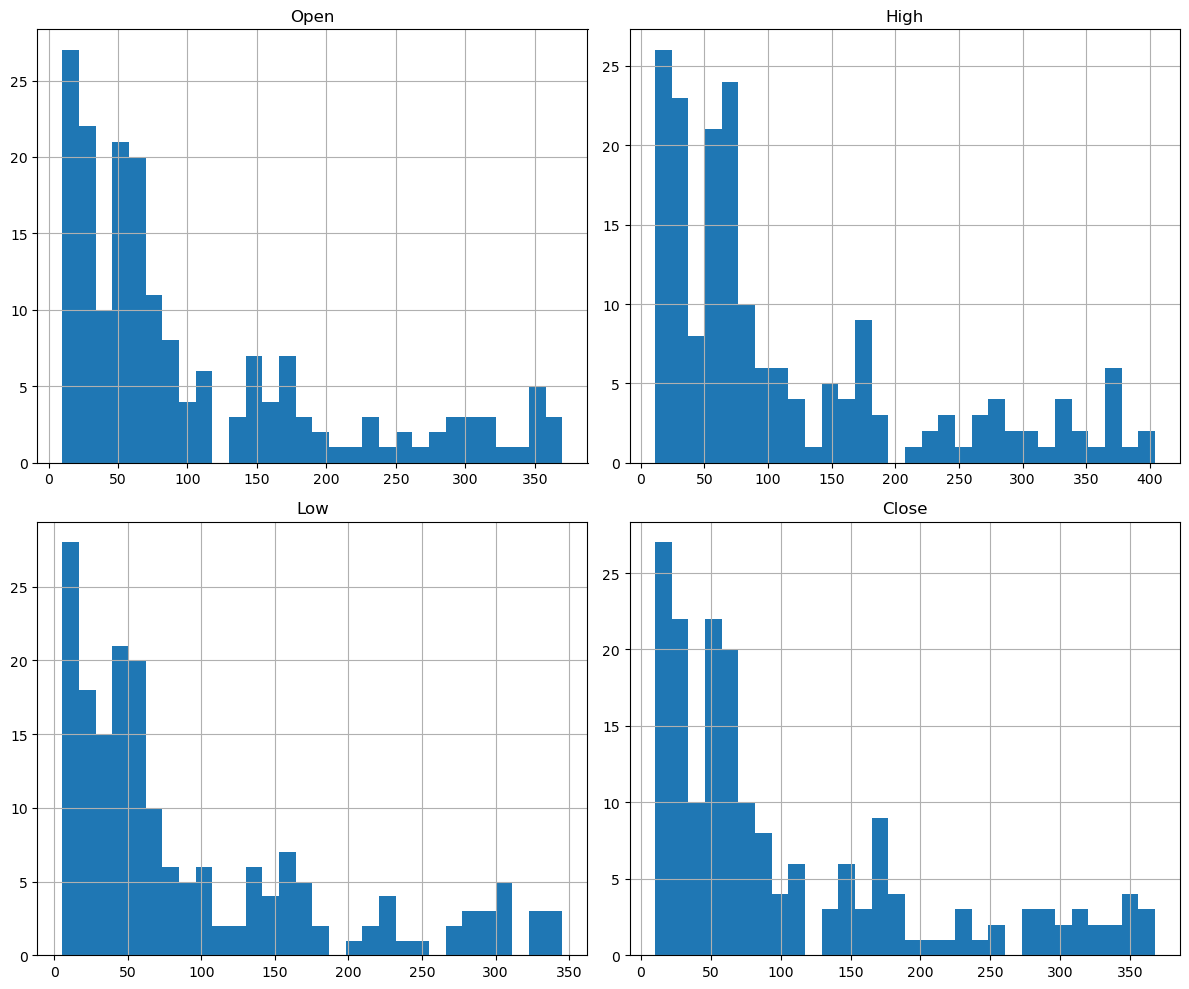

In [11]:
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

### 2.Bivarent Analysis:

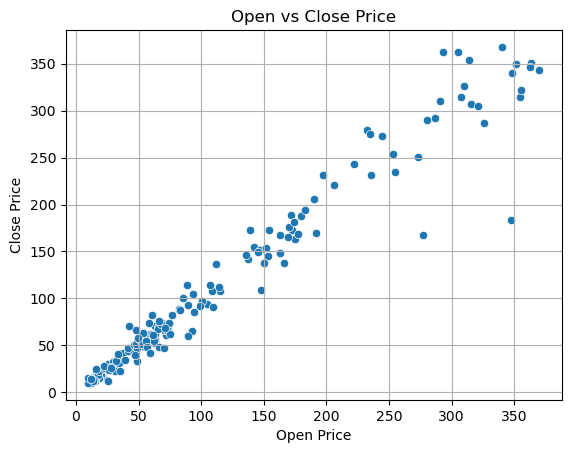

In [12]:
#This tells us how the price started vs ended for each month.
sns.scatterplot(data=df, x='Open', y='Close')
plt.title('Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

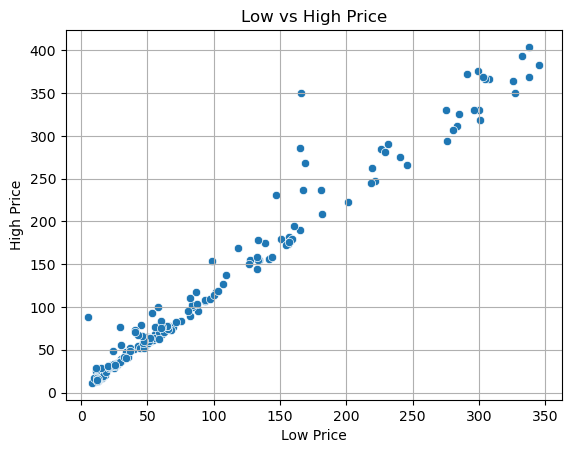

In [13]:
#This shows price volatility in the month
sns.scatterplot(data=df,x='Low',y='High')
plt.title('Low vs High Price')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.grid(True)
plt.show()


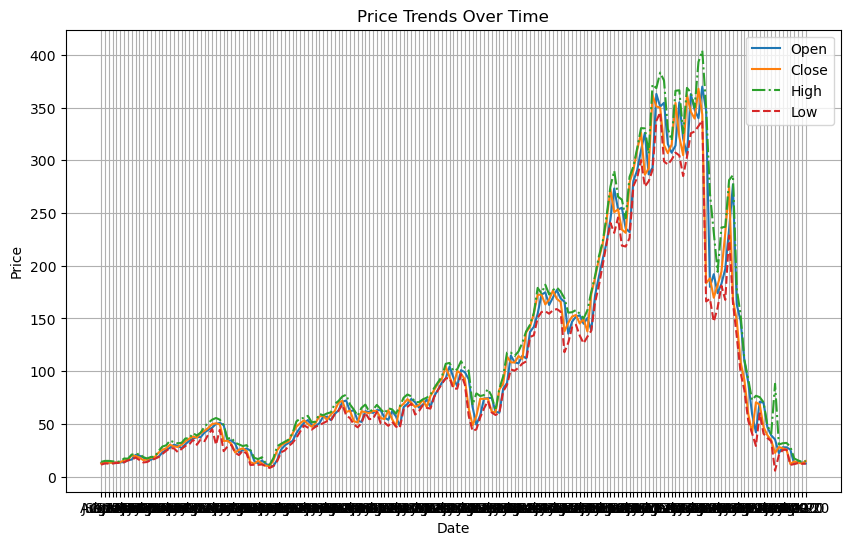

In [14]:
# Lineplot for price over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Open', label='Open')
sns.lineplot(data=df, x='Date', y='Close', label='Close')
sns.lineplot(data=df, x='Date', y='High', label='High', linestyle='-.')
sns.lineplot(data=df, x='Date', y='Low', label='Low', linestyle='--')
plt.title('Price Trends Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

### 3.Multivariate Analysis:

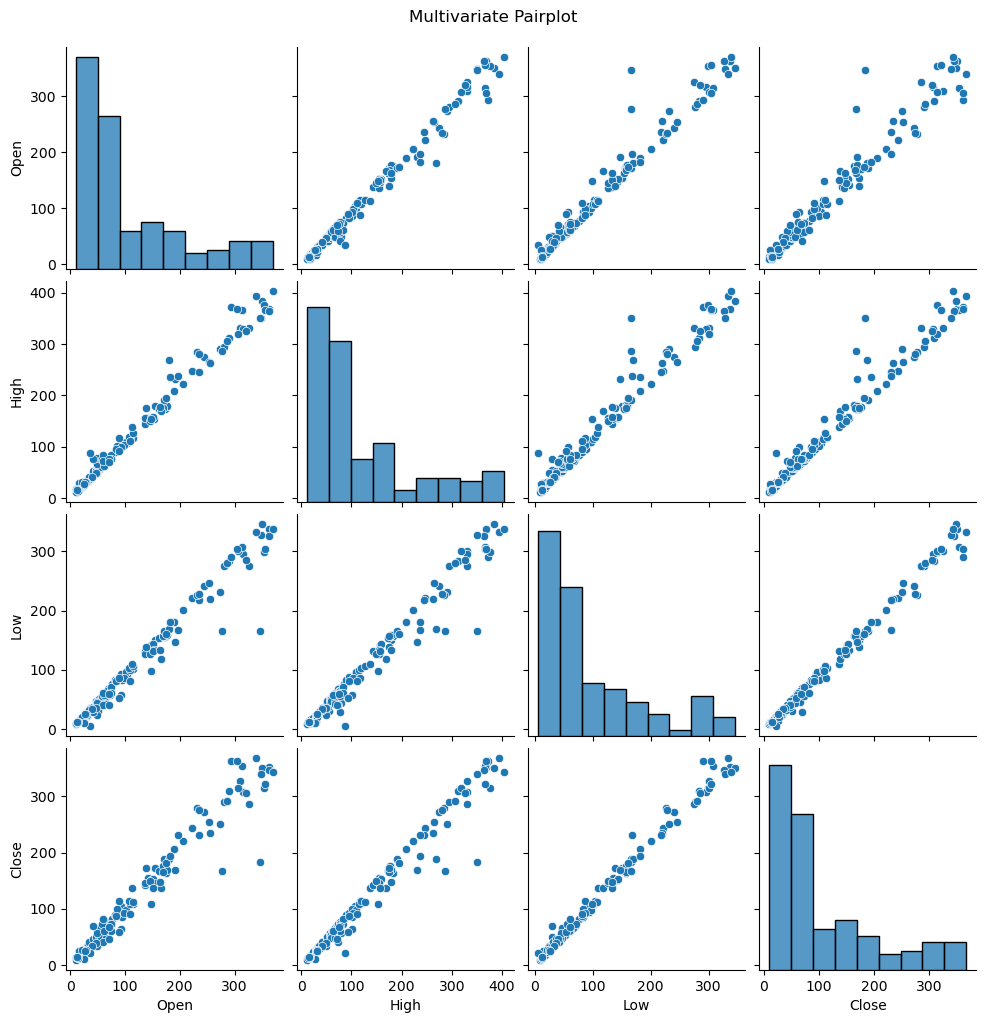

In [15]:
#Multivariate Analysis
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.suptitle("Multivariate Pairplot", y=1.02)
plt.show()

## Correlation Analysis :

In [16]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


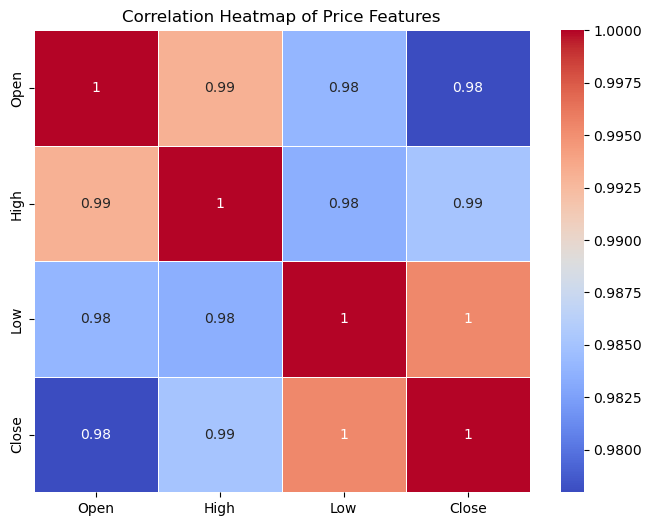

In [17]:
corr = df[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Price Features")
plt.show()

## Feature-target relationships :

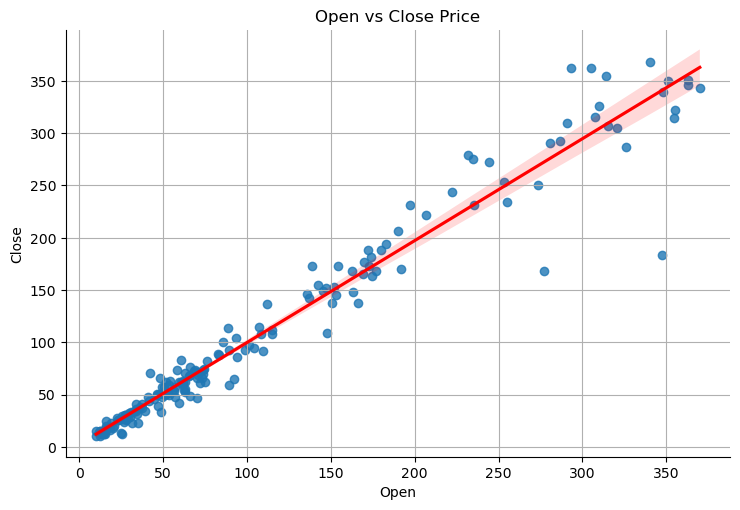

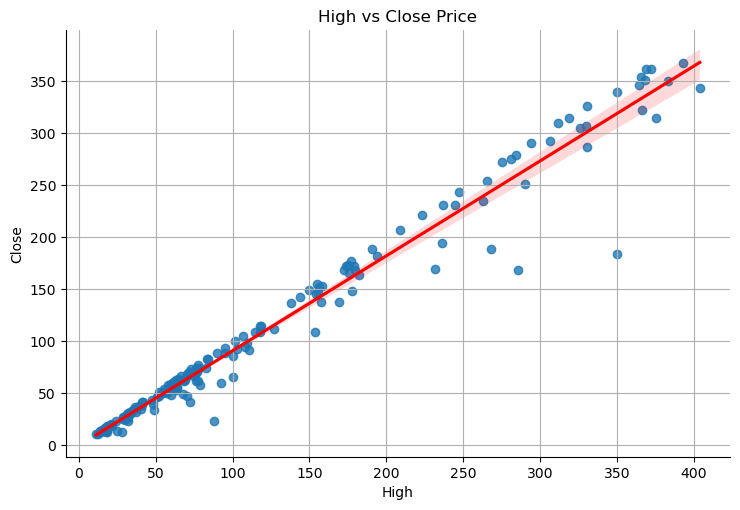

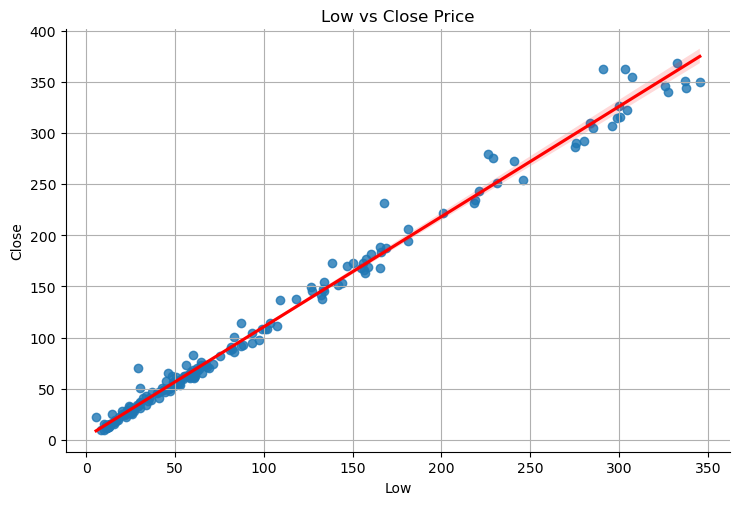

In [18]:
features = ['Open', 'High', 'Low']
for i in features:
    sns.lmplot(x=i, y='Close', data=df, aspect=1.5, line_kws={'color': 'red'})
    plt.title(f'{i} vs Close Price')
    plt.grid(True)
    plt.show()

## Outlier Detections :

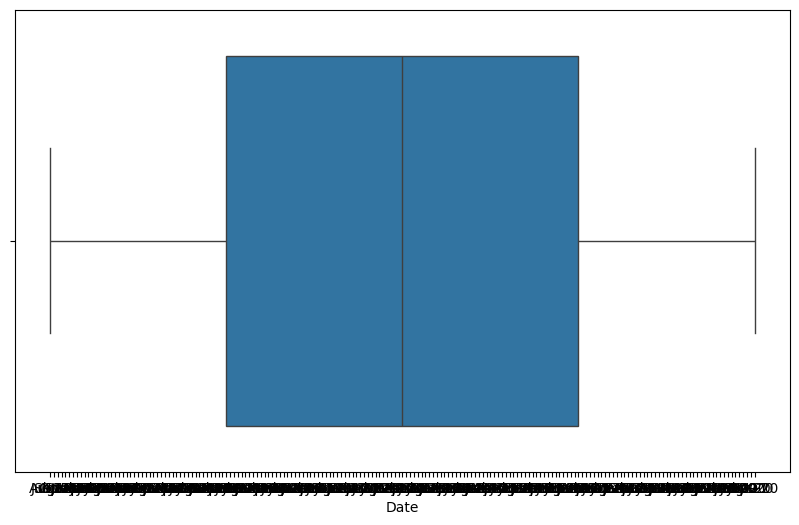

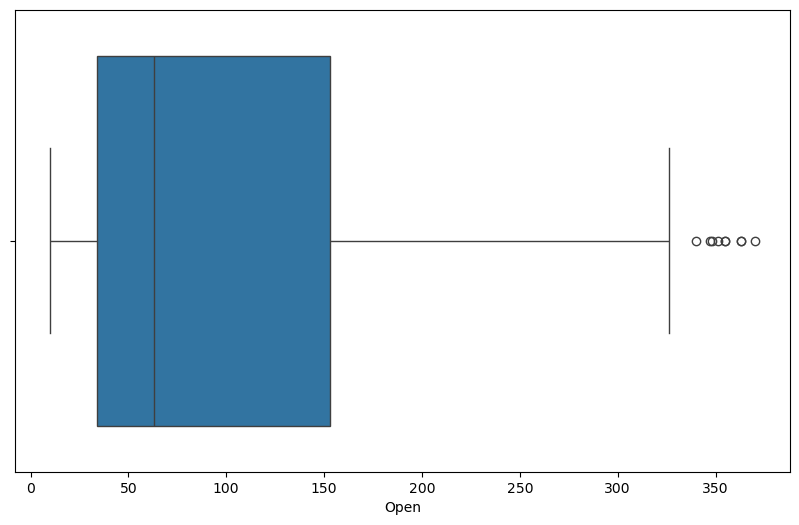

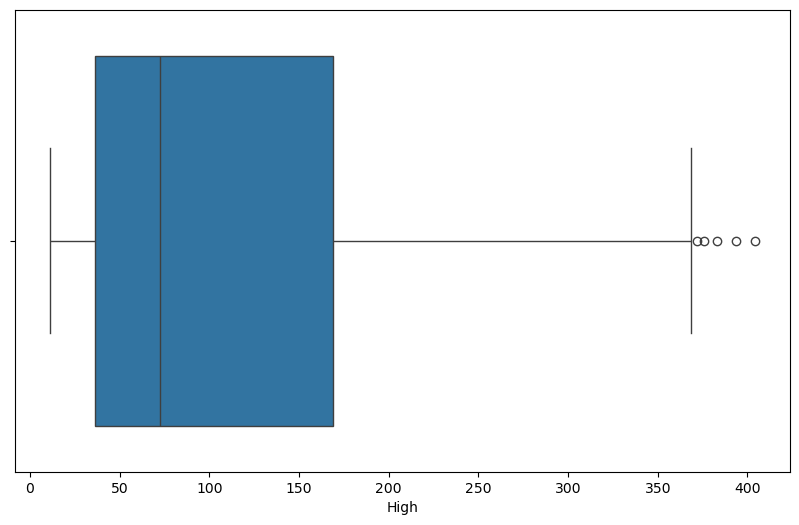

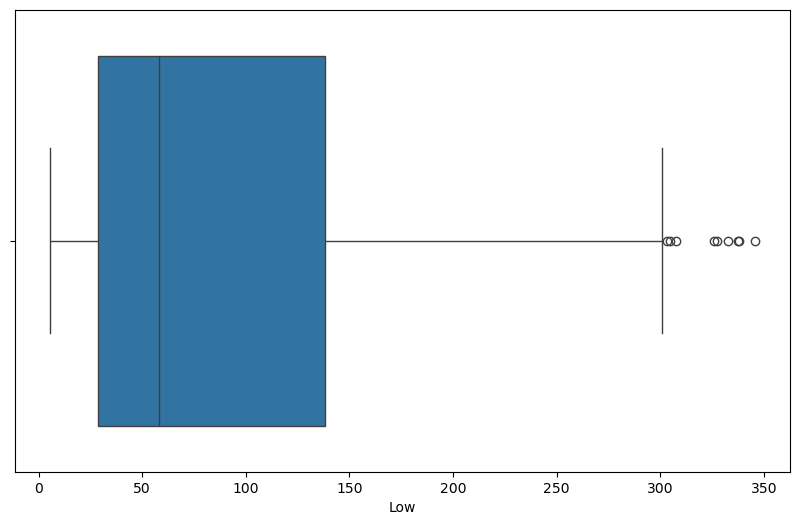

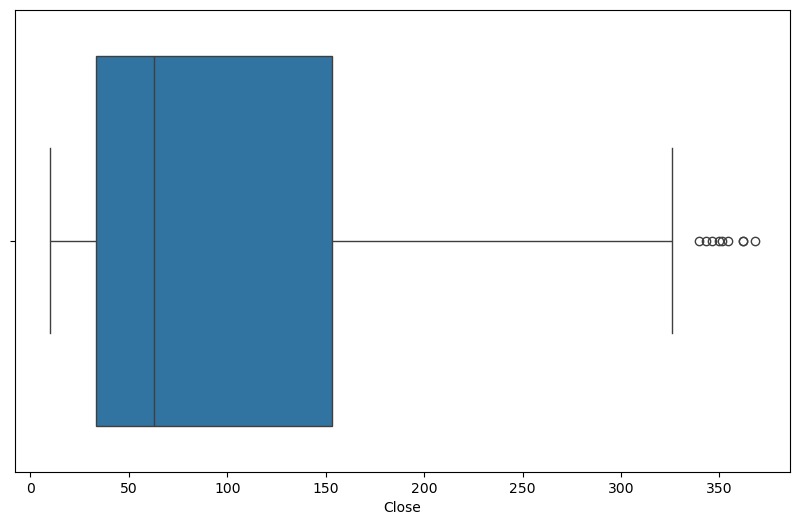

In [19]:
for i in df.columns:
    plt.figure(figsize = (10,6))
    sns.boxplot(x=df[i])
    plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


## Model Prep :

In [21]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [22]:
X = df.iloc[:,1:4]
X.head()

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88


In [23]:
y = df.iloc[:,-1]
y.head()

0    12.46
1    13.42
2    13.30
3    12.99
4    13.41
Name: Close, dtype: float64

In [24]:
dates = df["Date"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## Scaling :

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Importing Linear Regression :

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the result :

In [29]:
y_pred = model.predict(X_test)
y_pred

array([146.8937248 , 167.20984037,  68.45953285,  62.42786963,
       217.38936189,  64.20433151, 181.93448896, 261.42884072,
       292.8938948 ,  56.67958933,  96.33605848,  62.49143218,
        29.0319988 ,  23.56551123,  32.17569145,  59.7345366 ,
        26.85297862,  40.39560571,  29.07402699, 348.71910401,
        67.47965965,  31.27567476,  70.0407731 ,  91.13439606,
       300.94798568,  51.83245025,  15.87857666,  71.9756412 ,
        73.85202321,  20.64066785,  67.4931373 ,  87.54654812,
        34.57553556, 266.35735068,  23.87760415,  30.24056632,
        38.672298  ])

In [30]:
y_train

0       12.46
55      47.32
1       13.42
180     11.95
19      28.63
        ...  
10      18.03
101     74.02
116    163.31
166    147.95
161    181.75
Name: Close, Length: 148, dtype: float64

## Checking the accuracy :

In [31]:
print("Trainig Score: ",(model.score(X_train, y_train))*100,"%")
print("Testing Score: ",(model.score(X_test, y_test))*100,"%")

Trainig Score:  99.49570225920918 %
Testing Score:  99.54526910481997 %


## Visualizing the Predicted and Actual :

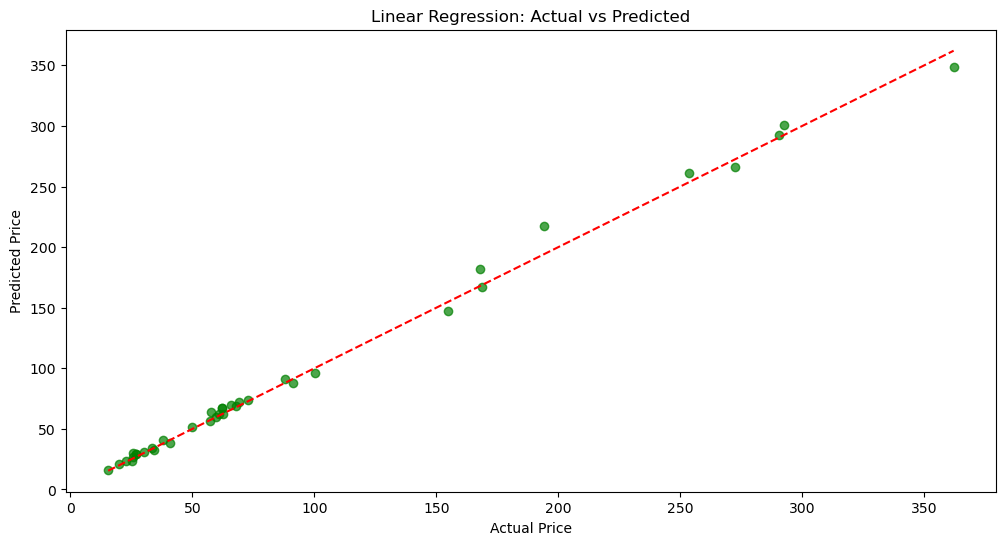

In [32]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

### Difference between actual and predicted value :

In [33]:
result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
result.sample(10)

,Actual,Predicted,Difference
119,168.60,167.209840,1.390160
165,168.00,181.934489,-13.934489
98,57.50,64.204332,-6.704332
8,20.08,20.640668,-0.560668
79,69.14,71.975641,-2.835641
85,65.97,70.040773,-4.070773
113,154.57,146.893725,7.676275
22,33.51,34.575536,-1.065536
103,60.95,62.427870,-1.477870
57,57.10,56.679589,0.420411


# Evaluation Metrics 

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nR2 is: ",r2)
print("\nMAE is: ",mae)
print("\nMSE is: ",mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9954526910481997

MAE is:  3.979481739222162

MSE is:  37.04904678094874

RMSE is:  6.086792815674667


# Decision Tree Regression 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
y_pred = dtree.predict(X_test)
y_pred

array([ 57.5 ,  43.48,  13.71,  15.62,  50.54, 339.6 , 154.57, 154.57,
        61.02,  62.9 , 339.6 ,  49.84,  73.46, 165.74,  34.55,  18.03,
        47.32,  46.95, 108.21, 145.23,  20.08, 351.15, 108.21, 243.44,
        26.97,  94.5 , 108.7 ,  18.03,  10.26,  60.95, 243.44, 100.28,
       145.92,  28.63,  74.02,  31.93,  10.26,  53.41,  70.07, 108.21,
        19.49,  49.84, 309.82,  92.2 , 194.3 ,  33.51,  31.93,  25.45,
       165.74,  46.18,  60.95, 163.31, 183.45, 165.74,  12.26,  31.13])

In [38]:
y_train

54      49.84
26      41.36
131    221.30
103     60.95
92      85.71
        ...  
83      67.83
63      71.86
16      25.32
30      50.54
138    279.10
Name: Close, Length: 129, dtype: float64

### Checking The Accuracy :

In [39]:
print("Trainig Score: ",(dtree.score(X_train, y_train))*100,"%")
print("Testing Score: ",(dtree.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  98.93874514331499 %


## Visualizing the Predicted and Actual :

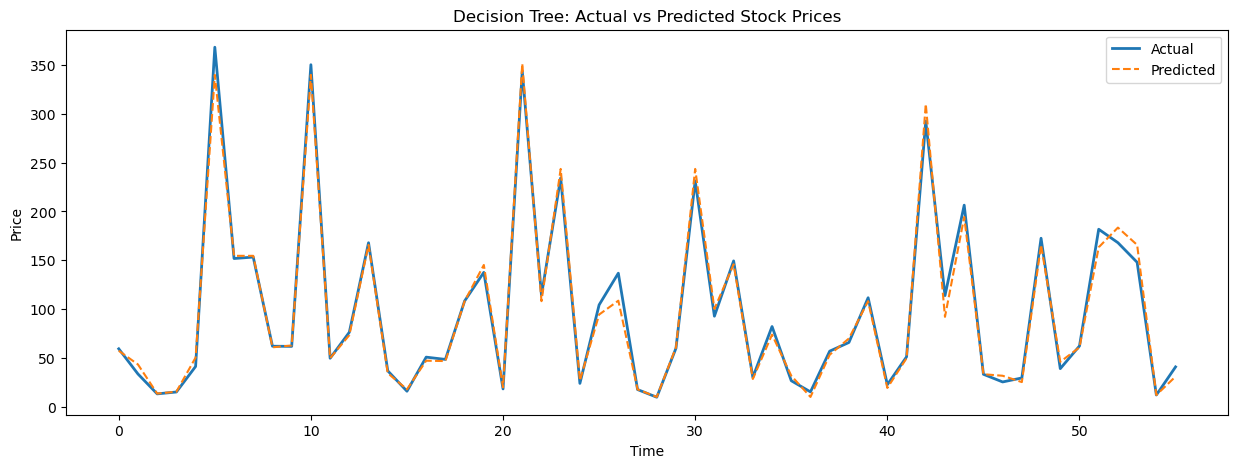

In [40]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Decision Tree: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Visualizing the Decision Tree :

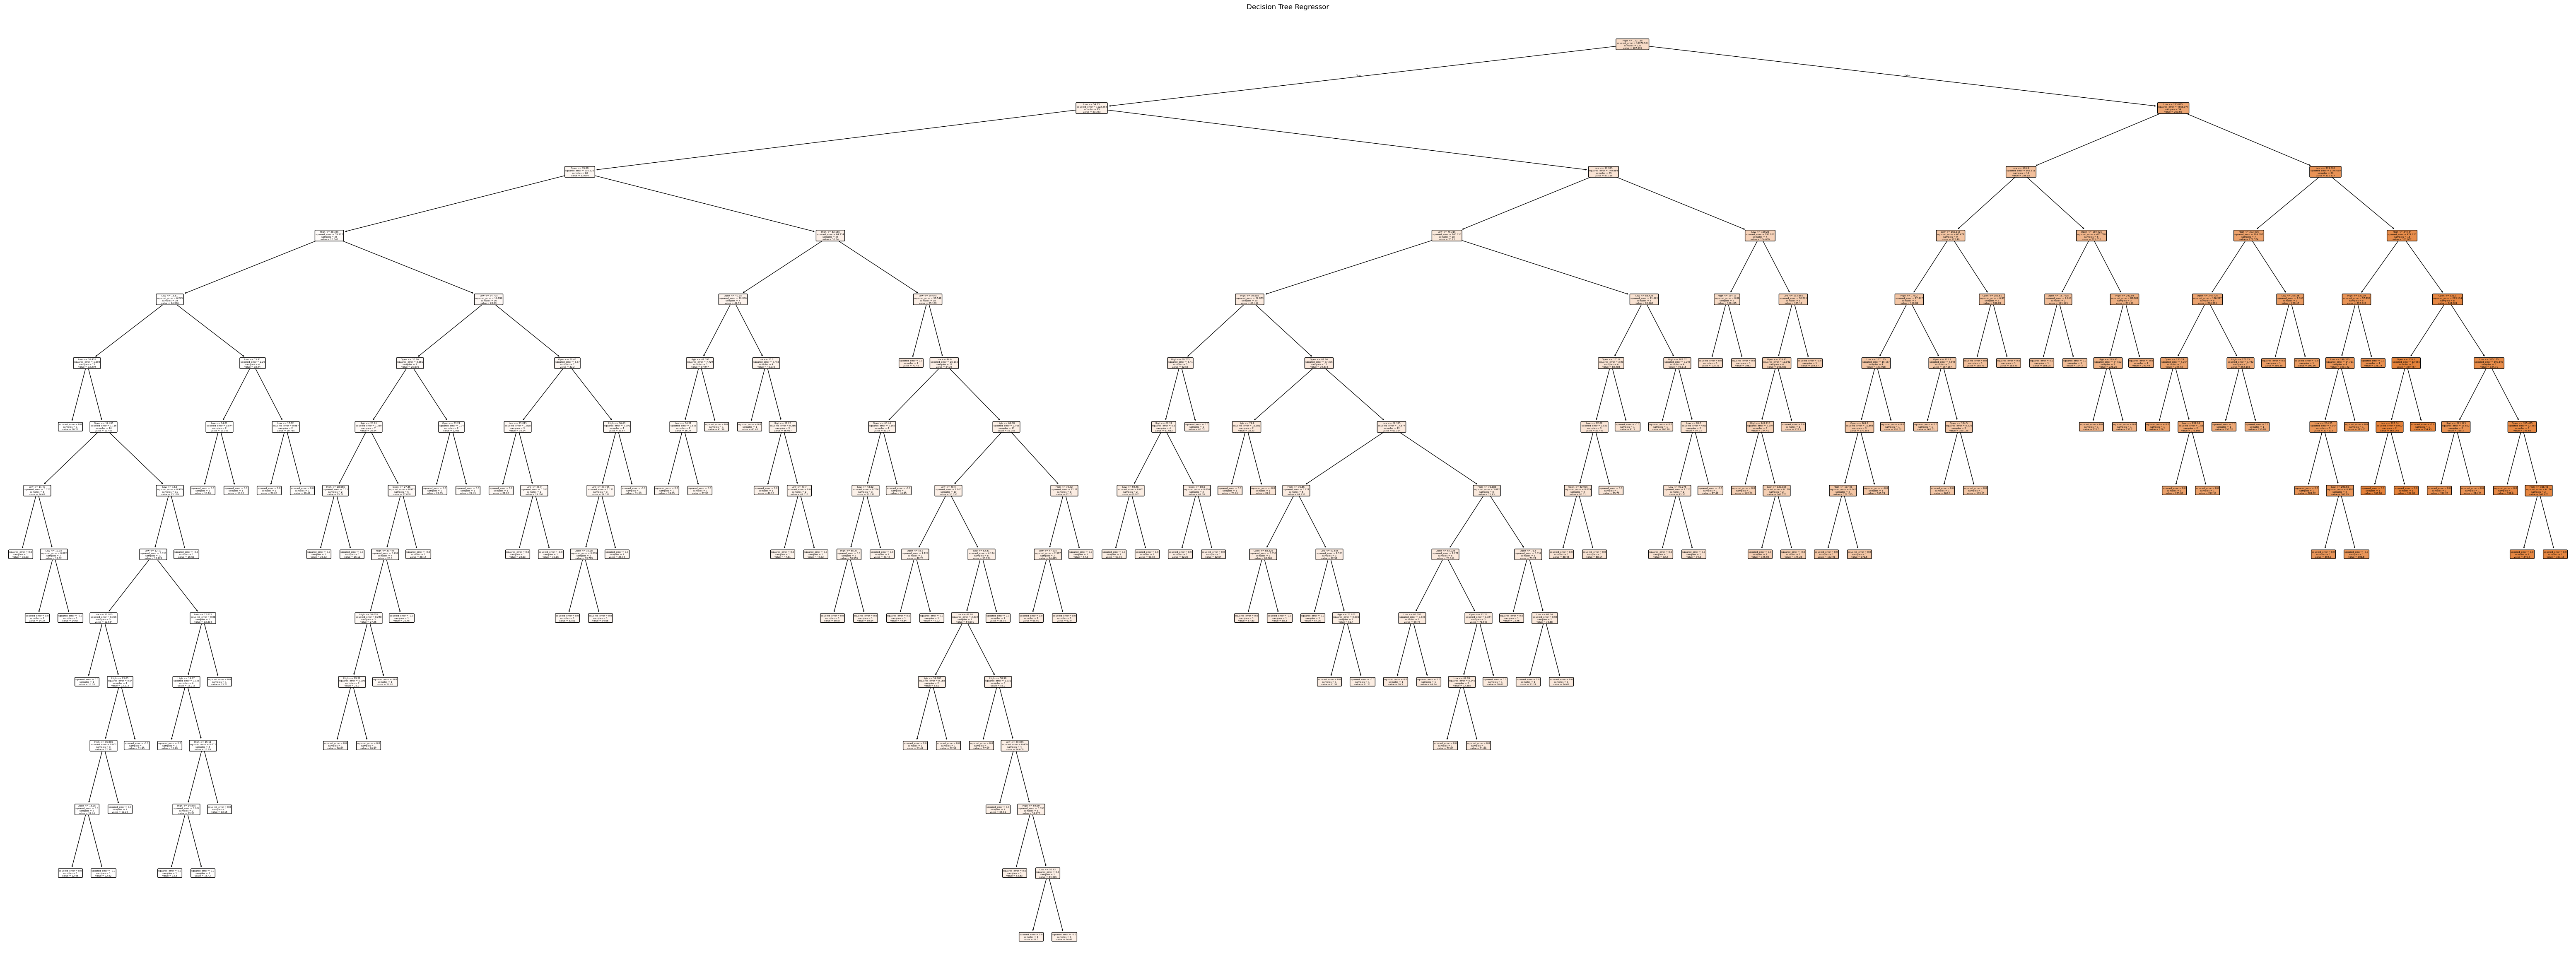

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,30))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

### Difference between actual and predicted value :

In [42]:
result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
result.sample(10)

,Actual,Predicted,Difference
21,30.31,28.63,1.68
110,111.70,108.21,3.49
123,151.82,154.57,-2.75
106,113.89,92.20,21.69
89,92.84,100.28,-7.44
124,153.30,154.57,-1.27
146,350.00,339.60,10.40
117,167.96,165.74,2.22
70,60.07,60.95,-0.88
161,181.75,163.31,18.44


# Evaluation Metrics:

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nR2 is: ",r2)
print("\nMAE is: ",mae)
print("\nMSE is: ",mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9893874514331499

MAE is:  6.31517857142857

MSE is:  84.73095892857137

RMSE is:  9.204942092624558


# Random Forest Regressor

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [45]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=10,random_state =0)
random_forest.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [46]:
y_pred = random_forest.predict(X_test)
y_pred

array([120.757,  26.902,  13.167,  12.675,  25.199,  33.767, 275.455,
       147.213,  73.835,  50.021,  13.269,  59.418,  61.923,  26.292,
       111.933,  92.2  , 108.346,  82.019,  68.615,  58.253, 273.307,
        56.404,  15.144,  29.147, 350.045, 153.382, 155.783,  13.42 ,
        33.565,  50.003,  62.981, 295.86 ,  42.875, 165.426,  71.364,
       339.845,  14.205])

In [47]:
y_train

136    234.28
101     74.02
70      60.07
130    206.39
140    309.82
        ...  
144    361.96
26      41.36
49      33.45
44       9.98
50      40.99
Name: Close, Length: 148, dtype: float64

## Checking the Accuracy :

In [48]:
print("Trainig Score: ",(random_forest.score(X_train, y_train))*100,"%")
print("Testing Score: ",(random_forest.score(X_test, y_test))*100,"%")

Trainig Score:  99.80961959692077 %
Testing Score:  99.73702501886866 %


## Visualizing the Predicted and Actual :

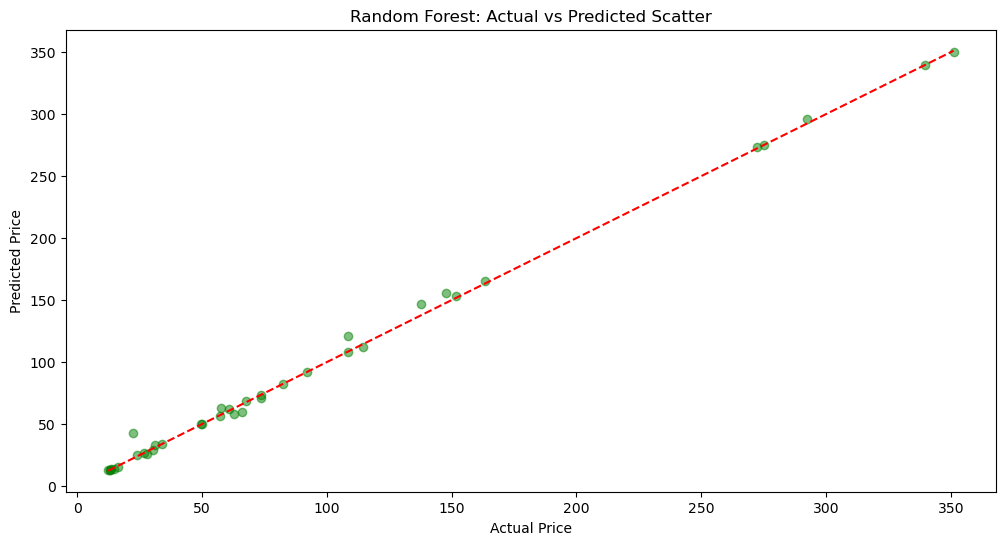

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Scatter')
plt.show()

### Visualizing the Tree :

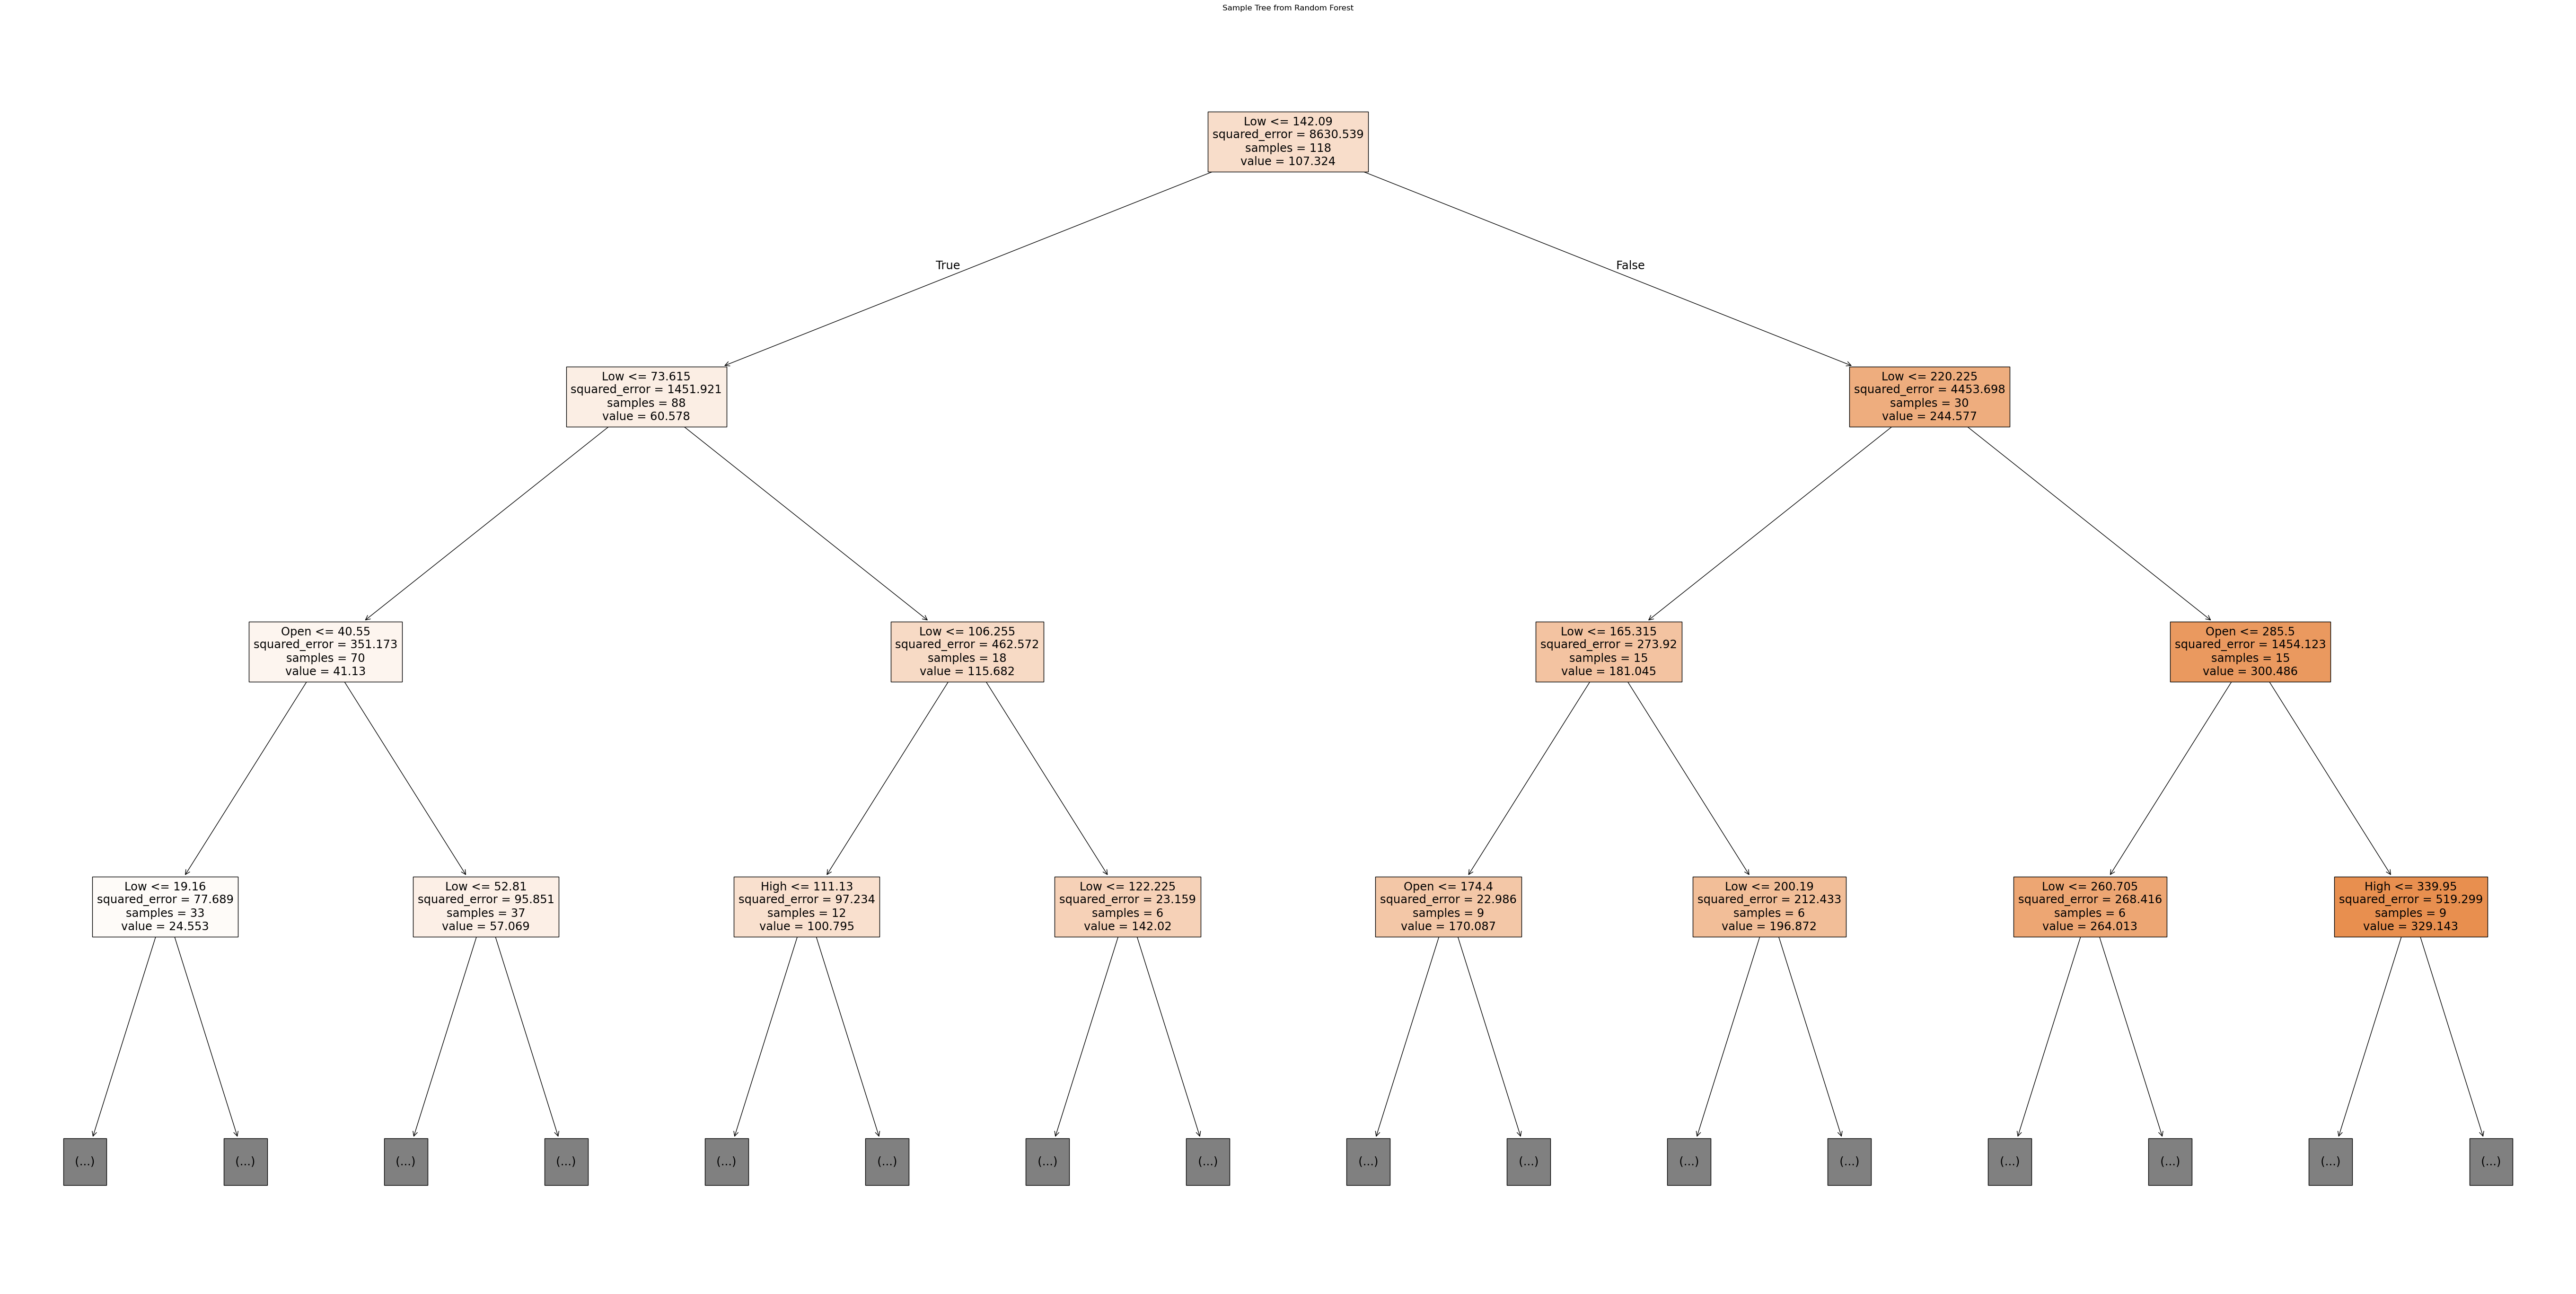

In [50]:
from sklearn.tree import plot_tree

# visualize the first tree
plt.figure(figsize=(70,35))
plot_tree(random_forest.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.title("Sample Tree from Random Forest")
plt.show()

### Difference between actual and predicted value :

In [51]:
result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
result.sample(10)

,Actual,Predicted,Difference
167,108.70,120.757,-12.057
87,82.29,82.019,0.271
145,351.15,350.045,1.105
116,163.31,165.426,-2.116
133,272.56,273.307,-0.747
176,22.45,42.875,-20.425
155,339.60,339.845,-0.245
12,16.16,15.144,1.016
80,73.46,73.835,-0.375
2,13.30,13.269,0.031


# Evaluation Metrics 

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nR2 is: ",r2)
print("\nMAE is: ",mae)
print("\nMSE is: ",mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9973702501886866

MAE is:  2.509702702702701

MSE is:  23.050401756756738

RMSE is:  4.801083394063962


# Support Vector Machine

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.fit_transform(X_test)

In [55]:
from sklearn.svm import SVR
SVR = SVR(kernel='rbf', C=100, epsilon=0.1)

In [56]:
SVR.fit(X_train, y_train)

SVR(C=100)

In [57]:
y_pred = SVR.predict(X_test)

## Checking the Accuracy :

In [58]:
print("Trainig Score: ",(SVR.score(X_train, y_train))*100,"%")
print("Testing Score: ",(SVR.score(X_test, y_test))*100,"%")

Trainig Score:  99.47614285016539 %
Testing Score:  96.48412660068186 %


## Visualization :

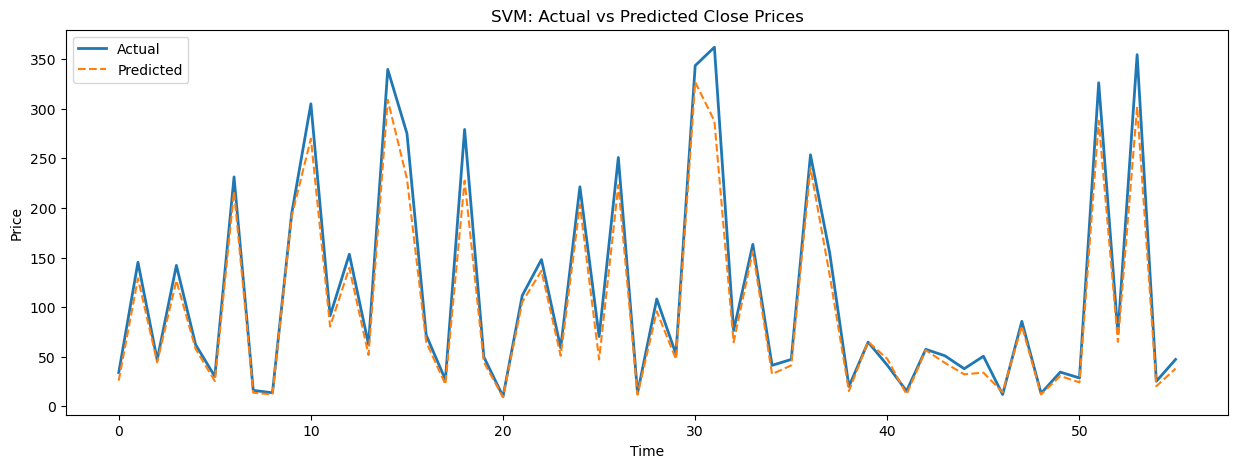

In [59]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('SVM: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Difference between actual and predicted value :

In [60]:
SVM_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
SVM_result.sample(10)

,Actual,Predicted,Difference
60,58.99,50.995962,7.994038
134,250.85,223.053305,27.796695
162,194.30,191.603413,2.696587
63,71.86,64.959724,6.900276
26,41.36,32.558968,8.801032
96,64.76,65.170464,-0.410464
7,16.12,13.801422,2.318578
131,221.30,203.282274,18.017726
80,73.46,65.073078,8.386922
37,26.83,22.149838,4.680162


# Evaluation Metrics

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nR2 is: ",r2)
print("\nMAE is: ",mae)
print("\nMSE is: ",mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9648412660068186

MAE is:  13.159787877133892

MSE is:  392.86939706698973

RMSE is:  19.820933304640064


# K Nearest Neighbor

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

In [63]:
from sklearn.preprocessing import StandardScaler
Scaler_X1 = StandardScaler()
X_train = Scaler_X1.fit_transform(X_train)
X_test = Scaler_X1.fit_transform(X_test)

In [64]:
from sklearn.neighbors import KNeighborsRegressor
k_near = KNeighborsRegressor(n_neighbors=5)
k_near.fit(X_train, y_train)

KNeighborsRegressor()

In [65]:
y_pred = k_near.predict(X_test)
y_pred

array([ 27.154, 138.698,  51.996, 130.968,  56.164,  26.566, 216.992,
        12.646,  12.646, 195.544, 298.836,  92.388, 151.54 ,  53.758,
       308.06 , 233.906,  64.446,  19.32 , 233.906,  47.036,  12.646,
       103.822, 135.914,  49.878, 195.334,  40.72 , 229.896,  12.646,
        96.288,  50.482, 340.37 , 297.186,  64.08 , 159.138,  33.2  ,
        41.368, 237.574, 135.7  ,  14.096,  64.868,  56.034,  13.358,
        57.274,  45.848,  31.77 ,  38.882,  14.346,  86.642,  12.646,
        33.2  ,  26.836, 298.836,  63.388, 302.084,  19.32 ,  37.714])

In [66]:
y_train

74      54.50
151    322.25
40      12.26
106    113.89
22      33.51
        ...  
103     60.95
67      51.29
117    167.96
47      29.68
172     68.30
Name: Close, Length: 129, dtype: float64

## Checking the Accuracy :

In [67]:
print("Trainig Score: ",(k_near.score(X_train, y_train))*100,"%")
print("Testing Score: ",(k_near.score(X_test, y_test))*100,"%")

Trainig Score:  98.61763309917811 %
Testing Score:  97.25404521886408 %


## Visualization :

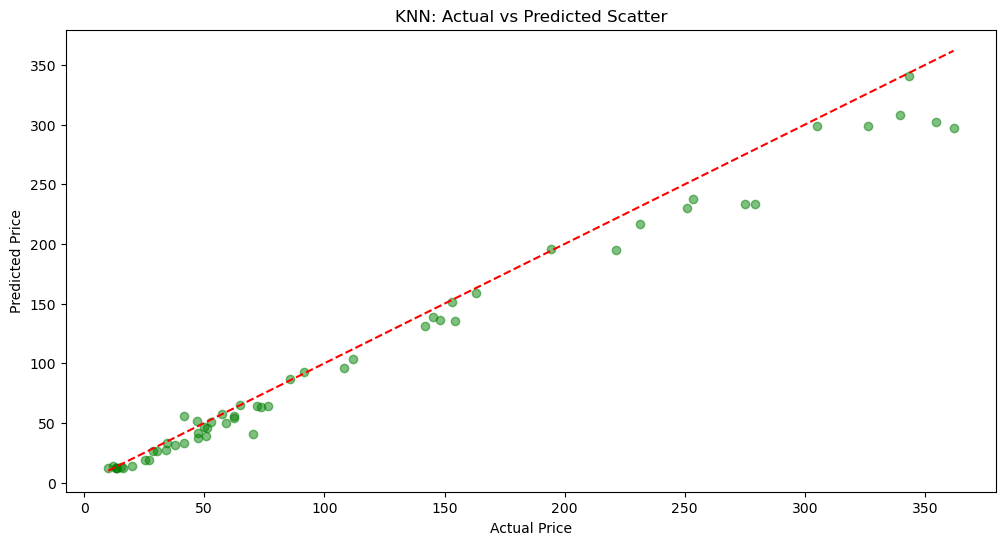

In [68]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs Predicted Scatter')
plt.show()

## Difference between actual and predicted value :

In [69]:
KNN_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
KNN_result.sample(10)

,Actual,Predicted,Difference
92,85.71,86.642,-0.932
152,304.90,298.836,6.064
113,154.57,135.700,18.870
175,34.55,33.200,1.350
125,145.23,138.698,6.532
168,91.30,92.388,-1.088
166,147.95,135.914,12.036
7,16.12,12.646,3.474
19,28.63,26.836,1.794
137,231.26,216.992,14.268


# Evaluation Metrics

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nR2 is: ",r2)
print("\nMAE is: ",mae)
print("\nMSE is: ",mse)
print("\nRMSE is: ",rmse)


R2 is:  0.9725404521886408

MAE is:  11.197928571428571

MSE is:  306.8374417142857

RMSE is:  17.51677600799547


# Cross Validation using Cross_val_score for all the algorithms :

In [71]:
from sklearn.model_selection import cross_val_score

train_lr=(((cross_val_score(model, X_train, y_train)).mean())*100)
test_lr=(((cross_val_score(model, X_test, y_test)).mean())*100)

train_dtree=(((cross_val_score(dtree, X_train, y_train)).mean())*100)
test_dtree=(((cross_val_score(dtree, X_test, y_test)).mean())*100)

train_rf=(((cross_val_score(random_forest, X_train, y_train)).mean())*100)
test_rf=(((cross_val_score(random_forest, X_test, y_test)).mean())*100)

train_svm=(((cross_val_score(SVR, X_train, y_train)).mean())*100)
test_svm=(((cross_val_score(SVR, X_test, y_test)).mean())*100)

train_knn=(((cross_val_score(k_near, X_train, y_train)).mean())*100)
test_knn=(((cross_val_score(k_near, X_test, y_test)).mean())*100)

print("\nLinear Regression:")
print("Training score:",train_lr)
print("Testing score:",test_lr)

print("\nDecision Tree Regressor:")
print("Training score:",train_dtree)
print("Testing score:",test_dtree)

print("\nRandom Forest Regressor: ")
print("Training score:",train_rf)
print("Testing score:",test_rf)

print("\nSupport Vector Machine: ")
print("Training score:",train_svm)
print("Testing score:",test_svm)

print("\nK Nearest Neighbor: ")
print("Training score:",train_knn)
print("Testing score:",test_knn)


Linear Regression:
Training score: 99.24373581977154
Testing score: 99.16267064632561

Decision Tree Regressor:
Training score: 98.46016297225795
Testing score: 97.95240421680452

Random Forest Regressor: 
Training score: 98.0391804071276
Testing score: 98.08100918684092

Support Vector Machine: 
Training score: 98.97370388152919
Testing score: 98.62314616882692

K Nearest Neighbor: 
Training score: 97.0851060357203
Testing score: 97.80974006919759


# Observations :

#### Linear Regression:
#### Observation:
Linear regression shows excellent performance on both training and testing sets, with minimal overfitting, indicating that the model generalizes well for this problem.

#### Decision Tree Regressor:
#### Observation: 
The Decision Tree performs well but has a slight decrease in testing performance, suggesting it might be slightly prone to overfitting, though still providing robust predictions.

#### Random Forest Regressor:
#### Observation: 
The Random Forest performs almost identically on training and testing sets, indicating a well-balanced model with no significant overfitting or underfitting.

#### Support Vector Machine:
#### Observation: 
SVM shows strong performance with a slight drop in testing score, demonstrating good generalization and stability.

#### K Nearest Neighbor:
#### Observation: 
KNN performs reasonably well but slightly underperforms compared to other models in terms of training accuracy. However, its testing score suggests a solid generalization.